# 과제 7
1. 선형 SVM에서 C값의 변화에 따른 accuracy의 변화와 과대적합에 미치는 영향을 논의할 것(iris 데이터를 사용해도 됨)

In [31]:
import seaborn as sns
iris=sns.load_dataset('iris') 
X=iris.drop('species',axis=1) 
y=iris['species']            

from sklearn.preprocessing import LabelEncoder 
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, 
                                               test_size=0.3, random_state=56, stratify=y)

from sklearn.preprocessing import StandardScaler #data의 표준화 함수 호출.
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [22]:
X_test.shape

(45, 4)

[]

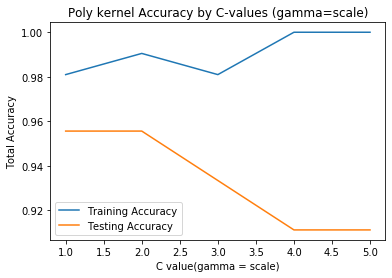

In [32]:
c_list = [1,5, 10, 50, 100]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='poly',C=x,random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Poly kernel Accuracy by C-values (gamma=scale)')
plt.plot() # Show graph

[]

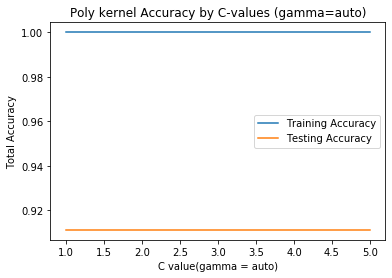

In [38]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
c_list = [1,5, 10, 50, 100]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='poly',C=x,random_state=1, gamma='auto')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = auto)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Poly kernel Accuracy by C-values (gamma=auto)')
plt.plot() # Show graph

In [12]:
# 선형 svm
from sklearn.svm import SVC 
from sklearn import metrics

svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train,y_train) 
y_train_pred=svm.predict(X_train) 
y_test_pred=svm.predict(X_test)  

print('linear : ' + str(metrics.accuracy_score(y_train,y_train_pred)))  
print('linear_test : ' + str(metrics.accuracy_score(y_test,y_test_pred)))
print(svm.n_support_ )
print('-----------------------------------------------')

svm=SVC(kernel='rbf',C=1.0,random_state=1)
svm.fit(X_train,y_train) 
y_train_pred=svm.predict(X_train) 
y_test_pred=svm.predict(X_test)  

print('rbf : ' + str(metrics.accuracy_score(y_train,y_train_pred)))  
print('rbf_test : ' + str(metrics.accuracy_score(y_test,y_test_pred)))
print(svm.n_support_ )
print('-----------------------------------------------')

svm=SVC(kernel='poly',C=1.0,random_state=1)
svm.fit(X_train,y_train) 
y_train_pred=svm.predict(X_train) 
y_test_pred=svm.predict(X_test)  

print('poly : ' + str(metrics.accuracy_score(y_train,y_train_pred)))  
print('poly_test : ' + str(metrics.accuracy_score(y_test,y_test_pred)))
print(svm.n_support_ )
print('-----------------------------------------------')

svm=SVC(kernel='sigmoid',C=1.0,random_state=1)
svm.fit(X_train,y_train) 
y_train_pred=svm.predict(X_train) 
y_test_pred=svm.predict(X_test)  

print('sigmoid : ' + str(metrics.accuracy_score(y_train,y_train_pred)))  
print('sigmoid_test : ' + str(metrics.accuracy_score(y_test,y_test_pred)))
print(svm.n_support_ )
print('-----------------------------------------------')

linear : 0.9904761904761905
linear_test : 0.9777777777777777
[ 3 10  8]
-----------------------------------------------
rbf : 0.9809523809523809
rbf_test : 0.9555555555555556
[ 5 22 19]
-----------------------------------------------
poly : 0.9904761904761905
poly_test : 0.9555555555555556
[4 6 5]
-----------------------------------------------
sigmoid : 0.08571428571428572
sigmoid_test : 0.044444444444444446
[35 35 35]
-----------------------------------------------


In [3]:
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train,y_train) 
y_train_pred=svm.predict(X_train) 
y_test_pred=svm.predict(X_test)  

In [4]:
svm.coef_ # 선형커널의 coefficient(선형커널 경우 사용)

array([[-0.04630589,  0.52106895, -1.00301941, -0.46411937],
       [-0.00708055,  0.17879988, -0.53817101, -0.29209852],
       [ 0.51323046,  0.9991306 , -1.91380091, -1.7679982 ]])

In [10]:
svm.intercept_ # 결정경계의 절편

array([1.45332688, 1.50668522, 6.18791256])

In [6]:
svm.support_ # support vector의 인덱스

array([ 21,  43, 101,   8,  23,  33,  38,  42,  54,  58,  76,  82,  85,
         5,  10,  19,  27,  41,  59,  60,  95])

In [7]:
svm.support_vectors_ # support vector

array([[4.8, 3.4, 1.9, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.3, 4.4, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [5.9, 3. , 5.1, 1.8],
       [6.5, 3. , 5.2, 2. ],
       [6. , 2.2, 5. , 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.8, 5.1, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.7, 4.9, 1.8]])

In [8]:
svm.n_support_ # 각 클래스에 대한 벡터 수 

array([ 3, 10,  8])

#### c값에 따른 accuracy 변화

- c : 정규화 매개변수. c가 작을수록 정규화 강도가 커짐. (l2)
> c가 작을수록 규제, 클수록 overfitting
- c는 양수의 부동 소숫점이어야 함. 

[]

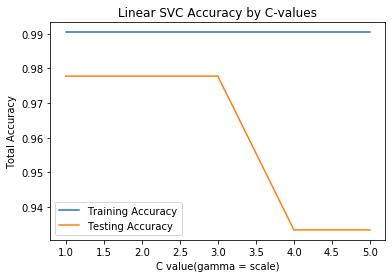

In [3]:
# rbf, gamma = scale
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

c_list = [1,2,3,4,5]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='linear',C=x,random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Linear SVC Accuracy by C-values')
plt.plot() # Show graph

2. 교재의 비선형 SVM모형(p116)에서 kenel=‘rbf’, ‘poly’, ‘sigmoid’으로 변경하고 C와 gamma를 변경하여 accuracy와 과대적합에 미치는 영향을 논의하라.

## 1. rbf

[]

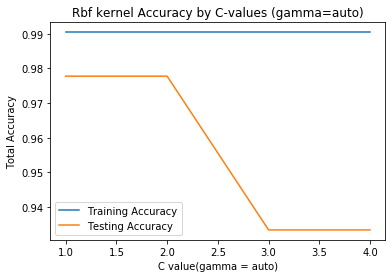

In [4]:
c_list = [1,5, 10, 15]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='rbf',C=x,random_state=1, gamma='auto')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = auto)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Rbf kernel Accuracy by C-values (gamma=auto)')
plt.plot() # Show graph

[]

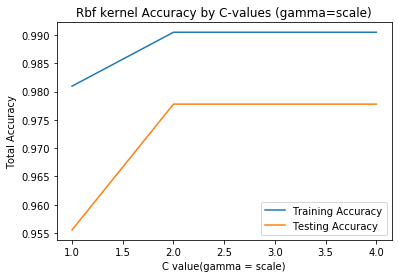

In [5]:
# rbf, gamma = scale
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

c_list = [1,5, 10, 15]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='rbf',C=x,random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Rbf kernel Accuracy by C-values (gamma=scale)')
plt.plot() # Show graph

감마가 클수록 overfitting될 가능성이 높음. 

[]

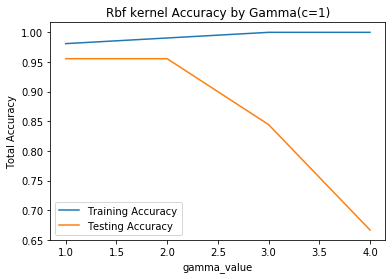

In [6]:
# c_list = [1,10, 100, 1000]
c_list = [1,10, 20, 100]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='rbf',C=1,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('gamma_value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Rbf kernel Accuracy by Gamma(c=1)')
plt.plot() # Show graph

## 2. poly

In [14]:
c_list = [1,5, 10, 50, 100]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='poly',C=x,random_state=1, gamma='auto')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = auto)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Poly kernel Accuracy by C-values (gamma=auto)')
plt.plot() # Show graph

NameError: name 'accuracy_score' is not defined

[]

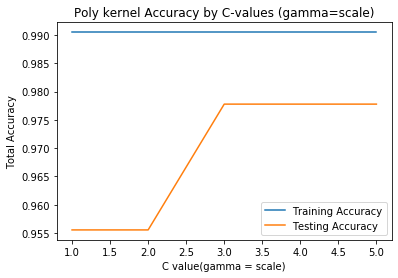

In [20]:
c_list = [1,5, 10, 50, 100]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='poly',C=x,random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Poly kernel Accuracy by C-values (gamma=scale)')
plt.plot() # Show graph

[]

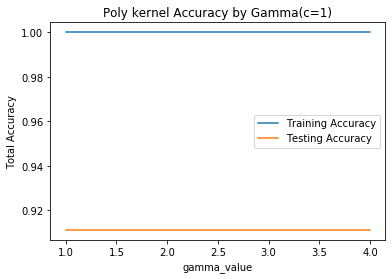

In [21]:
c_list = [1,10, 20, 100]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='poly',C=1,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('gamma_value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Poly kernel Accuracy by Gamma(c=1)')
plt.plot() # Show graph

In [10]:
test_errors

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

## 3. Sigmoid

[]

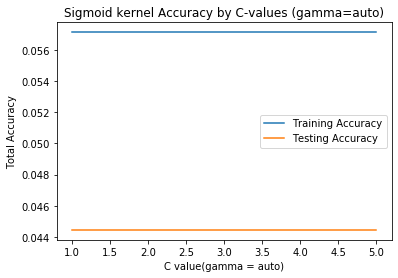

In [34]:
train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='sigmoid',C=x,random_state=1, gamma='auto')
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = auto)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Sigmoid kernel Accuracy by C-values (gamma=auto)')
plt.plot() # Show graph

[]

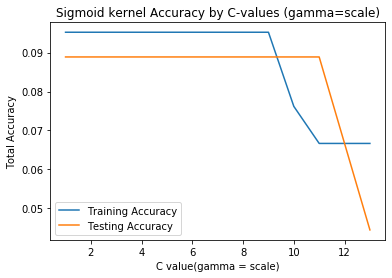

In [35]:
c_list = [1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in c_list:
    dtc=SVC(kernel='sigmoid',C=x,random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('C value(gamma = scale)') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Sigmoid kernel Accuracy by C-values (gamma=scale)')
plt.plot() # Show graph

[]

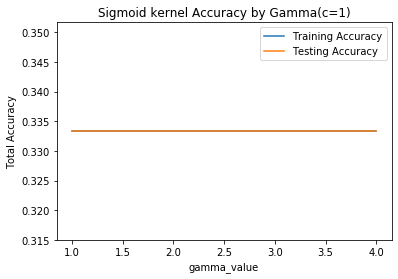

In [36]:
c_list = [1,10, 20, 100]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVC(kernel='sigmoid',C=1,random_state=1, gamma=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('gamma_value') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Sigmoid kernel Accuracy by Gamma(c=1)')
plt.plot() # Show graph

In [37]:
test_errors

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]